# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [1]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
tips = load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
y, X = patsy.dmatrices('tip ~ C(sex) + C(smoker) + C(time) + net_bill', tips)
X

DesignMatrix with shape (244, 5)
  Intercept  C(sex)[T.Female]  C(smoker)[T.No]  C(time)[T.Dinner]  net_bill
          1                 1                1                  1     15.98
          1                 0                1                  1      8.68
          1                 0                1                  1     17.51
          1                 0                1                  1     20.37
          1                 1                1                  1     20.98
          1                 0                1                  1     20.58
          1                 0                1                  1      6.77
          1                 0                1                  1     23.76
          1                 0                1                  1     13.08
          1                 0                1                  1     11.55
          1                 0                1                  1      8.56
          1                 1                1         

In [4]:
y

DesignMatrix with shape (244, 1)
   tip
  1.01
  1.66
  3.50
  3.31
  3.61
  4.71
  2.00
  3.12
  1.96
  3.23
  1.71
  5.00
  1.57
  3.00
  3.02
  3.92
  1.67
  3.71
  3.50
  3.35
  4.08
  2.75
  2.23
  7.58
  3.18
  2.34
  2.00
  2.00
  4.30
  3.00
  [214 rows omitted]
  Terms:
    'tip' (column 0)
  (to view full data, use np.asarray(this_obj))

In [5]:
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           2.64e-20
Time:                        07:56:15   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1999      0.242      4.952      0.000       0.723       1.677
C(sex)[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
C(smoker)[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
C(time)[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill              0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
y, X = patsy.dmatrices('tip ~ C(smoker) + C(time) + net_bill', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     40.35
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           3.79e-21
Time:                        07:56:15   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             758.3
Df Residuals:                     240   BIC:                             772.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.1978      0.221      5.412      0.000       0.762       1.634
C(smoker)[T.No]       0.1405      0.150      0.934      0.351      -0.156       0.437
C(time)[T.Dinner]     0.0591      0.165      0.358      0.721      -0.266       0.384
net_bill              0.0995      0.009     10.756      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.578   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.011
Skew:                           0.801   Prob(JB):                     4.63e-15
Kurtosis:                       4.982   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
y, X = patsy.dmatrices('tip ~ C(time) + net_bill', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     60.11
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           6.62e-22
Time:                        07:56:15   Log-Likelihood:                -375.58
No. Observations:                 244   AIC:                             757.2
Df Residuals:                     241   BIC:                             767.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.3015      0.191      6.798      0.000       0.924       1.679
C(time)[T.Dinner]     0.0531      0.165      0.322      0.747      -0.271       0.378
net_bill              0.0988      0.009     10.718      0.000       0.081       0.117
==============================================================================
Omnibus:                       33.453   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.186
Skew:                           0.746   Prob(JB):                     1.41e-13
Kurtosis:                       4.897   Cond. No.                         56.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

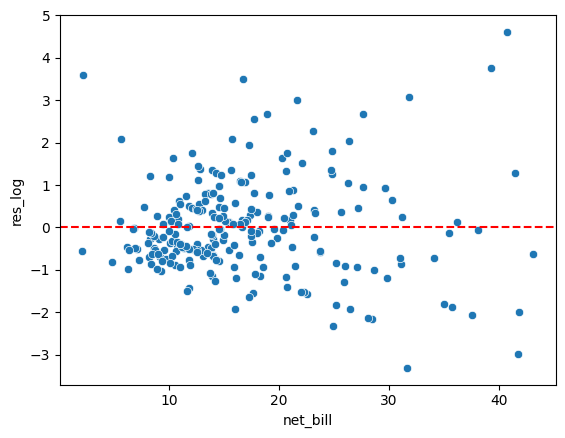

In [8]:
tips['res_log'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [9]:
y, X = patsy.dmatrices('tip ~ C(time) + np.log(net_bill)', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.47
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           4.90e-19
Time:                        07:56:16   Log-Likelihood:                -382.27
No. Observations:                 244   AIC:                             770.5
Df Residuals:                     241   BIC:                             781.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.2818      0.433     -2.959      0.003      -2.135      -0.428
C(time)[T.Dinner]     0.0871      0.169      0.515      0.607      -0.246       0.420
np.log(net_bill)      1.5553      0.159      9.792      0.000       1.242       1.868
==============================================================================
Omnibus:                       72.482   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.348
Skew:                           1.282   Prob(JB):                     4.70e-47
Kurtosis:                       6.796   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

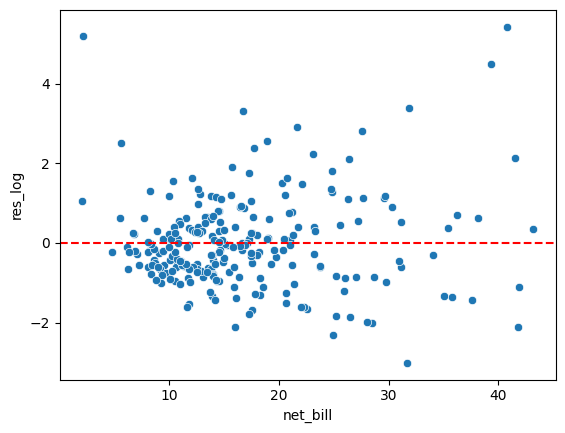

In [10]:
tips['res_log'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [11]:
y, X = patsy.dmatrices('tip ~ C(time) + np.power(net_bill, 2)', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     52.09
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           1.58e-19
Time:                        07:56:16   Log-Likelihood:                -381.12
No. Observations:                 244   AIC:                             768.2
Df Residuals:                     241   BIC:                             778.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.1895      0.151     14.517      0.000       1.892       2.487
C(time)[T.Dinner]         0.1032      0.168      0.615      0.539      -0.228       0.434
np.power(net_bill, 2)     0.0021      0.000      9.954      0.000       0.002       0.003
==============================================================================
Omnibus:                       22.350   Durbin-Watson:                   2.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.099
Skew:                           0.608   Prob(JB):                     1.77e-07
Kurtosis:                       4.258   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

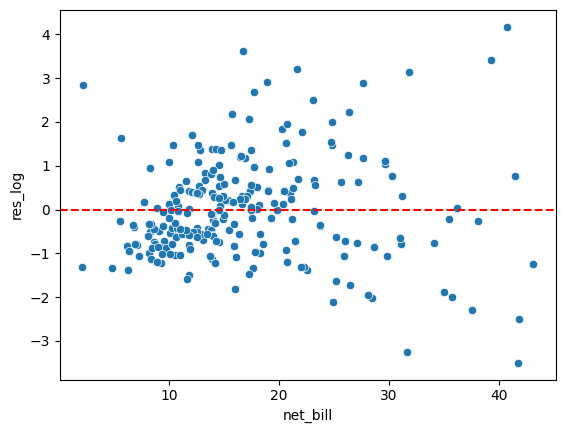

In [12]:
tips['res_log'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

Tranformando em LOG me pareceu a melhor opção.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [13]:
y, X = patsy.dmatrices('np.log(tip) ~ C(sex) + C(smoker) + C(time) + net_bill', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           1.21e-18
Time:                        07:56:16   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4504      0.078      5.801      0.000       0.297       0.603
C(sex)[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
C(smoker)[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
C(time)[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill              0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y, X = patsy.dmatrices('np.log(tip) ~ + C(smoker) + C(time) + net_bill', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     36.48
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           1.84e-19
Time:                        07:56:16   Log-Likelihood:                -97.423
No. Observations:                 244   AIC:                             202.8
Df Residuals:                     240   BIC:                             216.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4534      0.071      6.394      0.000       0.314       0.593
C(smoker)[T.No]       0.0435      0.048      0.903      0.367      -0.051       0.138
C(time)[T.Dinner]     0.0182      0.053      0.344      0.731      -0.086       0.122
net_bill              0.0303      0.003     10.228      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.521   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                2.175
Skew:                          -0.180   Prob(JB):                        0.337
Kurtosis:                       3.289   Cond. No.                         64.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
y, X = patsy.dmatrices('np.log(tip) ~ C(time) + net_bill', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     54.36
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           3.27e-20
Time:                        07:56:16   Log-Likelihood:                -97.837
No. Observations:                 244   AIC:                             201.7
Df Residuals:                     241   BIC:                             212.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.4855      0.061      7.916      0.000       0.365       0.606
C(time)[T.Dinner]     0.0163      0.053      0.309      0.758      -0.088       0.120
net_bill              0.0301      0.003     10.192      0.000       0.024       0.036
==============================================================================
Omnibus:                        3.120   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.210   Jarque-Bera (JB):                2.754
Skew:                          -0.226   Prob(JB):                        0.252
Kurtosis:                       3.257   Cond. No.                         56.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

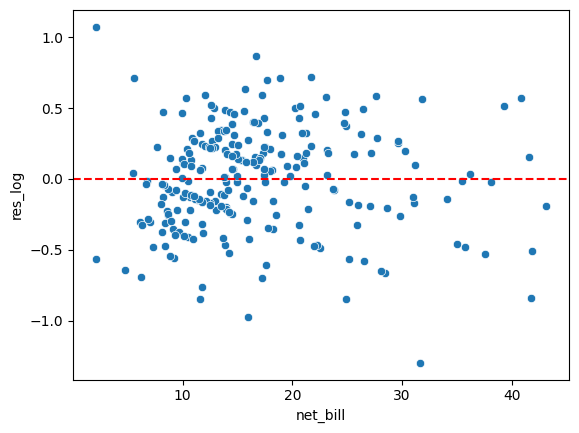

In [16]:
tips['res_log'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [17]:
y, X = patsy.dmatrices('np.log(tip) ~ C(time) + np.log(net_bill)', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.60
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           7.06e-21
Time:                        07:56:16   Log-Likelihood:                -96.286
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.3997      0.134     -2.979      0.003      -0.664      -0.135
C(time)[T.Dinner]     0.0196      0.052      0.375      0.708      -0.084       0.123
np.log(net_bill)      0.5119      0.049     10.406      0.000       0.415       0.609
==============================================================================
Omnibus:                       12.136   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               26.710
Skew:                           0.122   Prob(JB):                     1.59e-06
Kurtosis:                       4.602   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

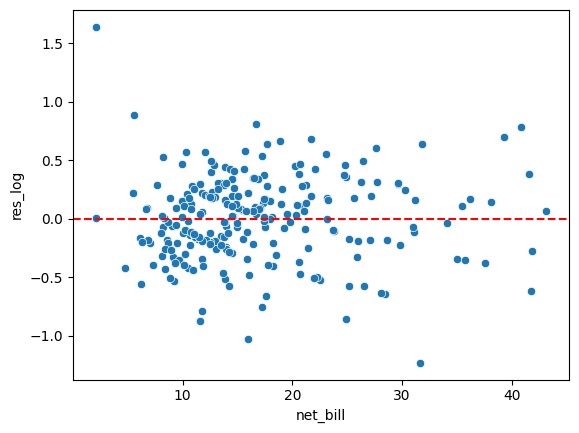

In [18]:
tips['res_log'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

In [19]:
y, X = patsy.dmatrices('np.log(tip) ~ C(time) + np.power(net_bill, 2)', tips)
modelo = sm.OLS(y,X).fit()

modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     40.46
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           7.04e-16
Time:                        07:56:16   Log-Likelihood:                -107.94
No. Observations:                 244   AIC:                             221.9
Df Residuals:                     241   BIC:                             232.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.7657      0.049     15.553      0.000       0.669       0.863
C(time)[T.Dinner]         0.0364      0.055      0.664      0.507      -0.072       0.144
np.power(net_bill, 2)     0.0006   6.96e-05      8.745      0.000       0.000       0.001
==============================================================================
Omnibus:                        2.848   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.843
Skew:                          -0.261   Prob(JB):                        0.241
Kurtosis:                       2.914   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

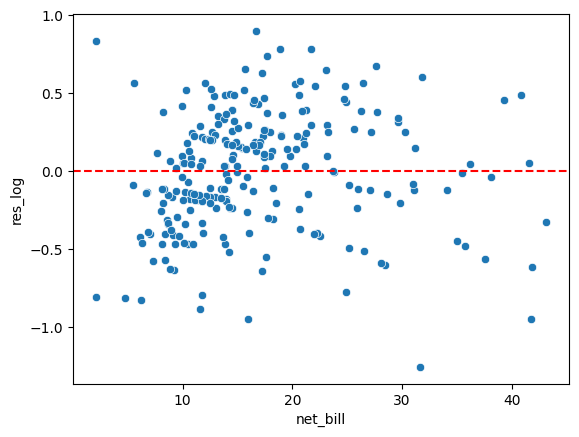

In [20]:
tips['res_log'] = modelo.resid

sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [21]:
df = pd.read_csv('previsao_de_renda.csv')
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.drop(['Unnamed: 0'], axis=1, inplace=True)

df.head()

,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [22]:
reg_renda_simples = smf.ols('np.log(renda) ~ tempo_emprego', data=df).fit()

reg_renda_simples.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        07:56:16   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851      0.000       7.816       7.860
tempo_emprego     0.0554      0.001     50.641      0.000       0.053       0.058
==============================================================================
Omnibus:                       33.539   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.792
Skew:                           0.127   Prob(JB):                     4.59e-08
Kurtosis:                       2.969   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

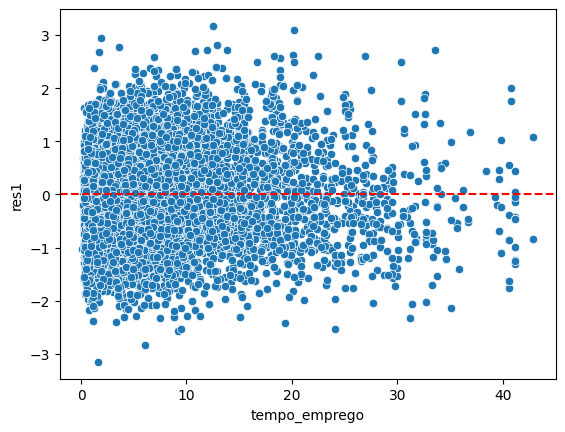

In [23]:
df['res1'] = reg_renda_simples.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res1', data = df)

plt.axhline(y=0, color='r', linestyle='--')

In [24]:
reg_renda_multipla = smf.ols('np.log(renda) ~ data_ref + id_cliente + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df).fit()

reg_renda_multipla.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.357
Method:                 Least Squares   F-statistic:                     178.0
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        07:56:17   Log-Likelihood:                -13551.
No. Observations:               12427   AIC:                         2.718e+04
Df Residuals:                   12387   BIC:                         2.748e+04
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.6020      0.237     27.882      0.000       6.138       7.066
data_ref[T.2015-02-01]               0.0028      0.035      0.079      0.937      -0.067       0.072
data_ref[T.2015-03-01]               0.0501      0.036      1.411      0.158      -0.020       0.120
data_ref[T.2015-04-01]               0.0489      0.035      1.381      0.167      -0.021       0.118
data_ref[T.2015-05-01]              -0.0186      0.035     -0.525      0.599      -0.088       0.051
data_ref[T.2015-06-01]               0.0730      0.035      2.057      0.040       0.003       0.142
data_ref[T.2015-07-01]               0.0281      0.035      0.795      0.427      -0.041       0.097
data_ref[T.2015-08-01]               0.0002      0.035      0.007      0.994      -0.069       0.070
data_ref[T.2015-09-01]              -0.0079      0.035     -0.223      0.823      -0.077       0.061
data_ref[T.2015-10-01]               0.0235      0.035      0.664      0.507      -0.046       0.093
data_ref[T.2015-11-01]               0.0202      0.035      0.569      0.569      -0.049       0.090
data_ref[T.2015-12-01]               0.0727      0.036      2.041      0.041       0.003       0.142
data_ref[T.2016-01-01]              -0.0376      0.035     -1.060      0.289      -0.107       0.032
data_ref[T.2016-02-01]              -0.0069      0.035     -0.194      0.846      -0.076       0.063
data_ref[T.2016-03-01]              -0.0393      0.036     -1.099      0.272      -0.109       0.031
sexo[T.M]                            0.7885      0.015     53.817      0.000       0.760       0.817
posse_de_veiculo[T.True]             0.0424      0.014      2.999      0.003       0.015       0.070
posse_de_imovel[T.True]              0.0798      0.014      5.684      0.000       0.052       0.107
tipo_renda[T.Bolsista]               0.1987      0.241      0.823      0.410      -0.274       0.672
tipo_renda[T.Empresário]             0.1564      0.015     10.474      0.000       0.127       0.186
tipo_renda[T.Pensionista]           -0.2895      0.241     -1.199      0.231      -0.763       0.184
tipo_renda[T.Servidor público]       0.0574      0.022      2.583      0.010       0.014       0.101
educacao[T.Pós graduação]            0.0964      0.159      0.606      0.544      -0.215       0.408
educacao[T.Secundário]              -0.0200      0.072     -0.277      0.782      -0.161       0.121
educacao[T.Superior completo]        0.0911      0.072      1.261      0.207      -0.051       0.233
educacao[T.Superior incompleto]     -0.0499      0.078     -0.641      0.521      -0.202       0.103
estado_civil[T.Separado]             0.3204      0.111      2.880      0.004       0.102       0.538
estado_civil[T.Solteiro]             0.2630      0.10

In [25]:
# Tirando as variaveis que não importam
reg_renda_multipla = smf.ols('np.log(renda) ~ data_ref + id_cliente + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + estado_civil + idade + tempo_emprego + qt_pessoas_residencia', data=df).fit()

reg_renda_multipla.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     227.9
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        07:56:17   Log-Likelihood:                -13587.
No. Observations:               12427   AIC:                         2.724e+04
Df Residuals:                   12396   BIC:                         2.747e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          6.5996      0.221     29.923      0.000       6.167       7.032
data_ref[T.2015-02-01]            -0.0005      0.036     -0.015      0.988      -0.070       0.069
data_ref[T.2015-03-01]             0.0480      0.036      1.348      0.178      -0.022       0.118
data_ref[T.2015-04-01]             0.0456      0.035      1.284      0.199      -0.024       0.115
data_ref[T.2015-05-01]            -0.0164      0.035     -0.463      0.643      -0.086       0.053
data_ref[T.2015-06-01]             0.0742      0.036      2.086      0.037       0.004       0.144
data_ref[T.2015-07-01]             0.0263      0.035      0.744      0.457      -0.043       0.096
data_ref[T.2015-08-01]            -0.0018      0.036     -0.051      0.959      -0.071       0.068
data_ref[T.2015-09-01]             0.0087      0.035      0.245      0.806      -0.060       0.078
data_ref[T.2015-10-01]             0.0379      0.035      1.067      0.286      -0.032       0.107
data_ref[T.2015-11-01]             0.0395      0.035      1.114      0.265      -0.030       0.109
data_ref[T.2015-12-01]             0.0908      0.036      2.552      0.011       0.021       0.161
data_ref[T.2016-01-01]            -0.0227      0.035     -0.639      0.523      -0.092       0.047
data_ref[T.2016-02-01]             0.0118      0.035      0.334      0.739      -0.058       0.081
data_ref[T.2016-03-01]            -0.0295      0.036     -0.823      0.411      -0.100       0.041
sexo[T.M]                          0.7827      0.015     53.552      0.000       0.754       0.811
posse_de_veiculo[T.True]           0.0523      0.014      3.701      0.000       0.025       0.080
posse_de_imovel[T.True]            0.0821      0.014      5.949      0.000       0.055       0.109
tipo_renda[T.Bolsista]             0.2802      0.242      1.159      0.246      -0.194       0.754
tipo_renda[T.Empresário]           0.1668      0.015     11.213      0.000       0.138       0.196
tipo_renda[T.Pensionista]         -0.2321      0.242     -0.960      0.337      -0.706       0.242
tipo_renda[T.Servidor público]     0.0770      0.022      3.478      0.001       0.034       0.120
estado_civil[T.Separado]           0.3211      0.112      2.879      0.004       0.102       0.540
estado_civil[T.Solteiro]           0.2599      0.109      2.382      0.017       0.046       0.474
estado_civil[T.União]             -0.0362      0.025     -1.435      0.151      -0.086       0.013
estado_civil[T.Viúvo]              0.3586      0.116      3.095      0.002       0.131       0.586
id_cliente                     -2.583e-06   1.37e-06     -1.891      0.059   -5.26e-06    9.44e-08
qtd_filhos                        -0.2537      0.108     -2.345      0.019      -0.466      -0.042
idade         

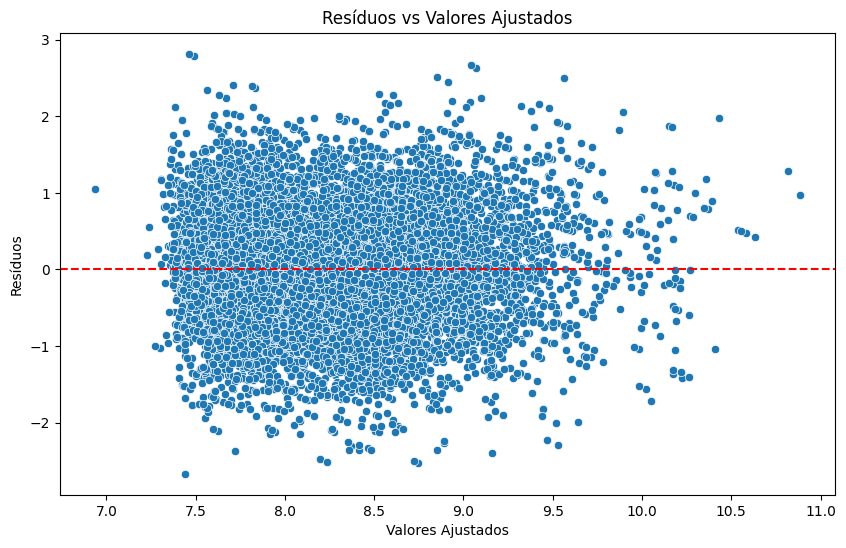

In [26]:
# Calcular os resíduos e valores ajustados
df['res2'] = reg_renda_multipla.resid
df['valores_ajustados'] = reg_renda_multipla.fittedvalues

# Criar o gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='valores_ajustados', y='res2', data=df)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs Valores Ajustados')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.show()